In [90]:
### generate data
import numpy as np
np.random.seed(5)

def generate_data(n_samples, true_coefficients, noise_level=0.1):

    # Generate a random input signal
    k = len(true_coefficients)
    m, n = true_coefficients[0].shape

    x = np.random.randn(n_samples, m)

    # Generate the desired signal by passing the input through the known system
    y = np.zeros((n_samples, n)) 

    for j in range(k):
        y += np.dot(x, true_coefficients[j]) 
    y += noise_level * np.random.randn(n_samples, n)
    
    return x, y

# Example usage
n_samples = 300
# a series of matrix: k x m x n 
# k : influence scope 5
# m : output dimension  3
# n : input dimension 2

k = 1
m = 3
n = 2
true_coefficients = [np.random.randn(3, 2) for _ in range(1)]
noise_level = 0.1
x, y = generate_data(n_samples, true_coefficients, noise_level)
print("Input signal:", x[:3])
print("Desired signal:", y[:3])

Input signal: [[-0.9092324  -0.59163666  0.18760323]
 [-0.32986996 -1.19276461 -0.20487651]
 [-0.35882895  0.6034716  -1.66478853]]
Desired signal: [[-1.83238084  0.68710999]
 [-3.04669364  0.08595731]
 [ 1.18611853 -2.76397773]]


In [91]:
### LMS filter
k = len(true_coefficients)
def lms_filter(x, y, k, mu ):
    Ws = [] 
    m, n = x.shape[1], y.shape[1]
    w = np.array([np.random.randn(m, n) for _ in range(k)])  # k x m x n
    e = np.zeros((n_samples, n))
    for i in range(k, len(x)):
        y_hat = np.zeros((n,))
        for j in range(k):
            y_hat += np.dot(x[i-j], w[j])
        error = y[i] - y_hat 
        e[i] = error
        for j in range(k):
            w[j] += mu *  np.outer(x[i-j], error)
        Ws.append(w.reshape(m, n).copy())
    return w,e, Ws


In [92]:
w,e, Ws = lms_filter(x, y, k, 0.01)
print("Estimated coefficients:", w[0])
print ("True coefficients:", true_coefficients[0])

Estimated coefficients: [[ 0.35873997 -0.33764306]
 [ 2.32398094 -0.25061386]
 [ 0.09229681  1.4746442 ]]
True coefficients: [[ 0.44122749 -0.33087015]
 [ 2.43077119 -0.25209213]
 [ 0.10960984  1.58248112]]


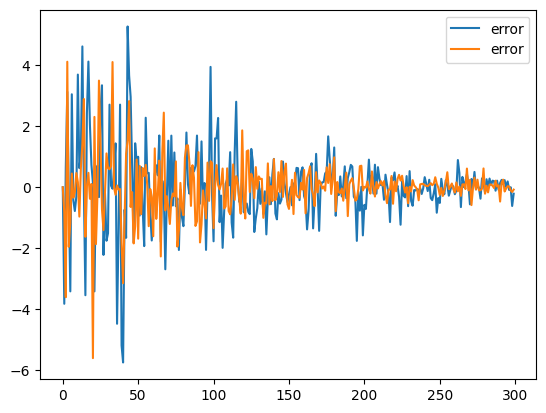

In [93]:
### plot the error
import matplotlib.pyplot as plt
plt.figure()
plt.plot(e, label='error')
plt.legend()
plt.show()


In [94]:
### save Ws to file
import pickle
with open('NoMemLMSWs.pkl', 'wb') as f:
    pickle.dump(Ws, f)


In [95]:
Ws[0]

array([[-0.67767829, -0.43173154],
       [-0.35841281, -0.52829383],
       [-0.30982666, -0.60354996]])

In [96]:
Ws[100]

array([[ 0.02604311, -0.34110108],
       [ 1.21663709, -0.31216245],
       [ 0.01962488,  0.7676506 ]])